In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [31]:
df=pd.read_csv("Salary_Data.csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [33]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [34]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<ipython-input-35-bc20e5e6d548>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

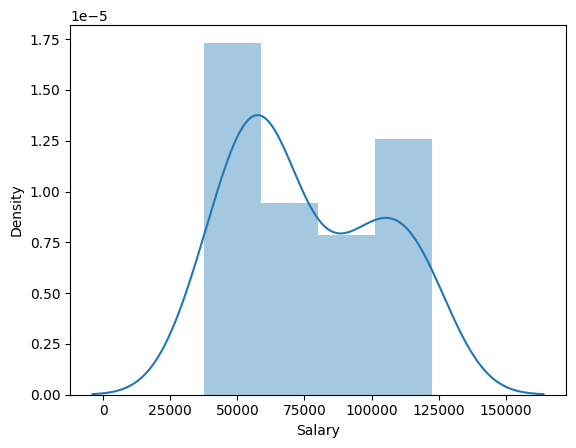

In [35]:
sns.distplot(df['Salary'])

<ipython-input-36-6737e57d990c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

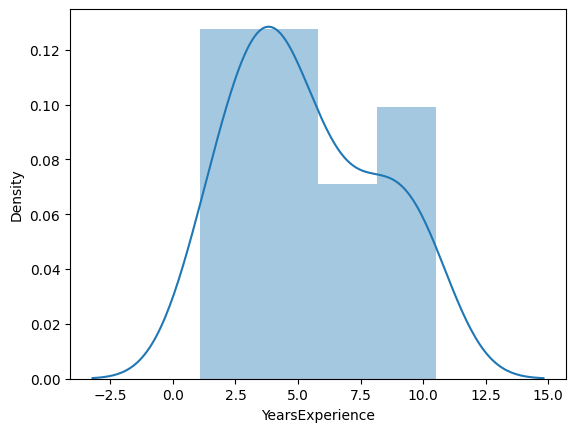

In [36]:
sns.distplot(df['YearsExperience'])

<Axes: xlabel='Salary', ylabel='YearsExperience'>

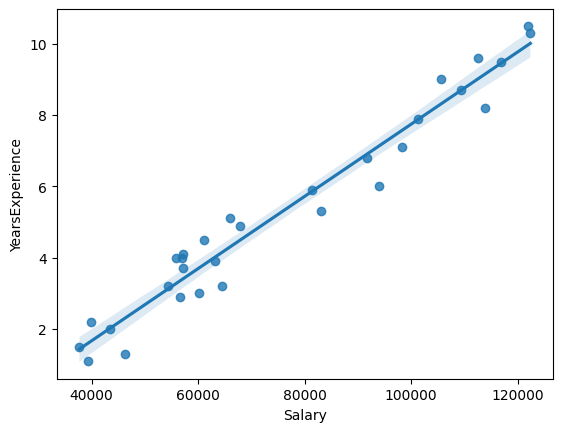

In [37]:
sns.regplot(x=df['Salary'],y=df['YearsExperience'])

In [38]:
modl=smf.ols("YearsExperience~Salary",data=df).fit()

In [39]:
modl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        07:07:52   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
pred=modl.predict(df["Salary"])

In [41]:
rmse = np.sqrt(np.mean((np.array(df["YearsExperience"])-np.array(pred))**2))
rmse

0.5788774181748744

<Axes: xlabel='Salary', ylabel='YearsExperience'>

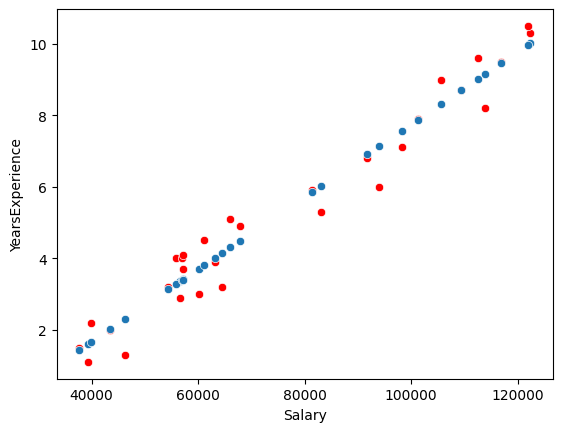

In [42]:
sns.scatterplot(x="Salary",y="YearsExperience",data=df,color="red")
sns.scatterplot(x="Salary",y=pred,data=df)

In [43]:
model2 = smf.ols("YearsExperience~np.log(Salary)",data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           7.03e-18
Time:                        07:07:53   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(Salary)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
pred2=model2.predict(df["Salary"])

In [45]:
rmse2 = np.sqrt(np.mean((np.array(df["YearsExperience"])-np.array(pred2))**2))
rmse2

0.727768203687128

<Axes: xlabel='Salary', ylabel='YearsExperience'>

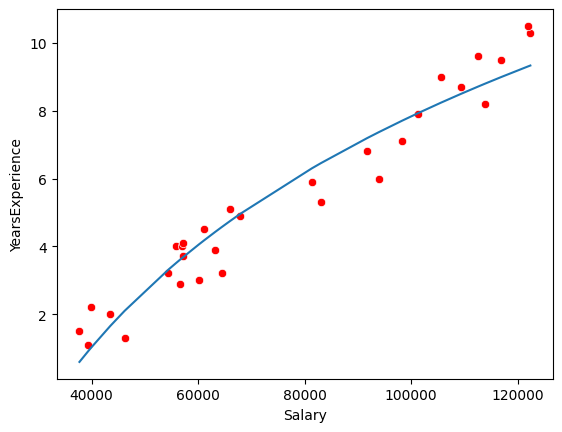

In [46]:
sns.scatterplot(x="Salary",y="YearsExperience",data=df,color="red")
sns.lineplot(x="Salary",y=pred2,data=df)

In [47]:
model3 = smf.ols("np.log(YearsExperience)~Salary",data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Mon, 25 Sep 2023   Prob (F-statistic):           3.25e-13
Time:                             07:07:53   Log-Likelihood:                0.92814
No. Observations:                       30   AIC:                             2.144
Df Residuals:                           28   BIC:                             4.946
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
pred3= model3.predict(df["Salary"])

In [49]:
pred3=np.exp(pred3)

In [50]:
rmse3 = np.sqrt(np.mean((np.array(df["YearsExperience"])-np.array(pred3))**2))
rmse3

0.864953676361536

<Axes: xlabel='Salary', ylabel='YearsExperience'>

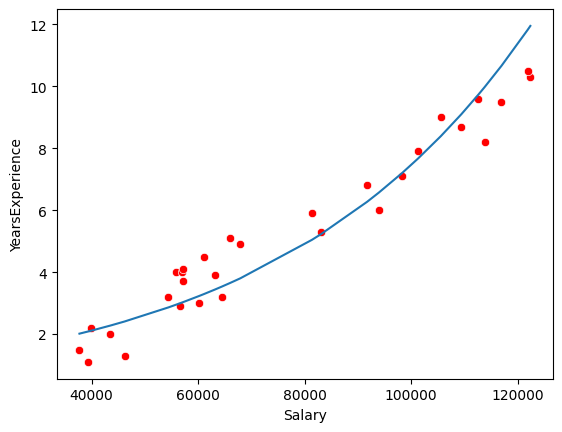

In [51]:
sns.scatterplot(x="Salary",y="YearsExperience",data=df,color="red")
sns.lineplot(x="Salary",y=pred3,data=df)

<Axes: ylabel='Count'>

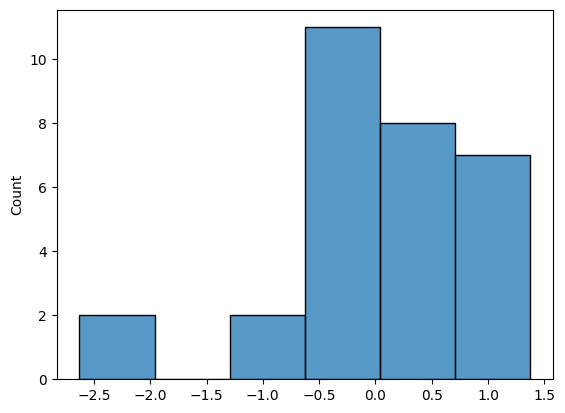

In [52]:
sns.histplot(model3.resid_pearson)